In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set the graphs to show in the jupyter notebook
%matplotlib inline

In [2]:
#import csv file
sales = pd.read_csv('D:\Rohit IMP. File\python\case study\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv')
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


**1. Compare Sales by region for 2016 with 2015 using bar chart**

<Figure size 1200x600 with 0 Axes>

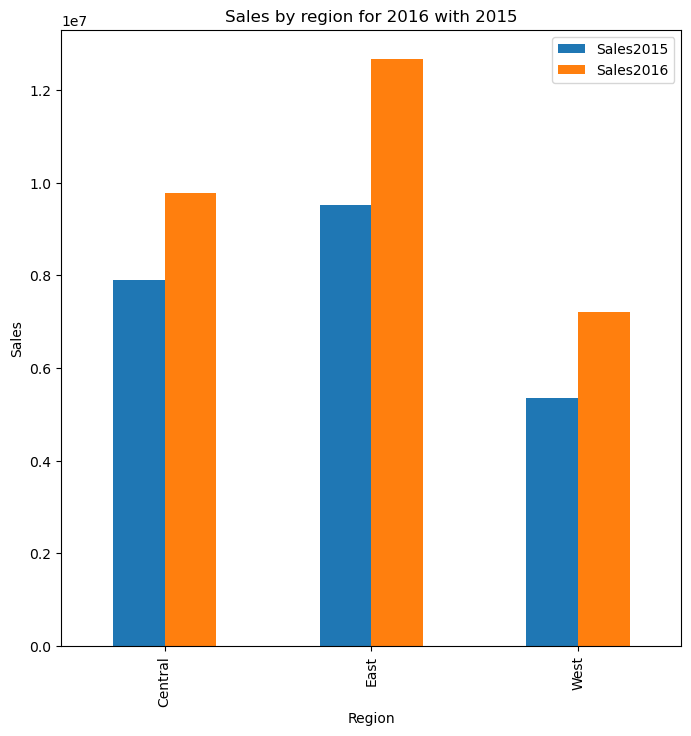

In [3]:
region_sales = sales.groupby('Region')['Sales2015','Sales2016'].sum()
plt.figure(figsize=(12,6))
region_sales.plot(kind="bar",figsize=(8,8))
plt.ylabel('Sales')
plt.title("Sales by region for 2016 with 2015")
plt.show()

**2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.**

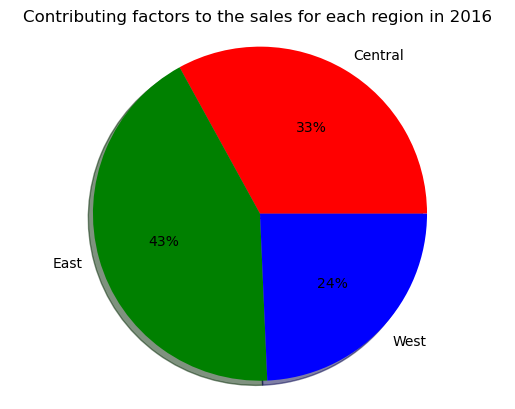

In [4]:
sales_pie = sales.groupby("Region")["Sales2016"].sum()

plt.pie(sales_pie,autopct="%1.0f%%",labels=["Central","East","West"],shadow=True,colors=['r', 'g', 'b'])
plt.title("Contributing factors to the sales for each region in 2016")
plt.axis('equal')
plt.show()

**3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers**

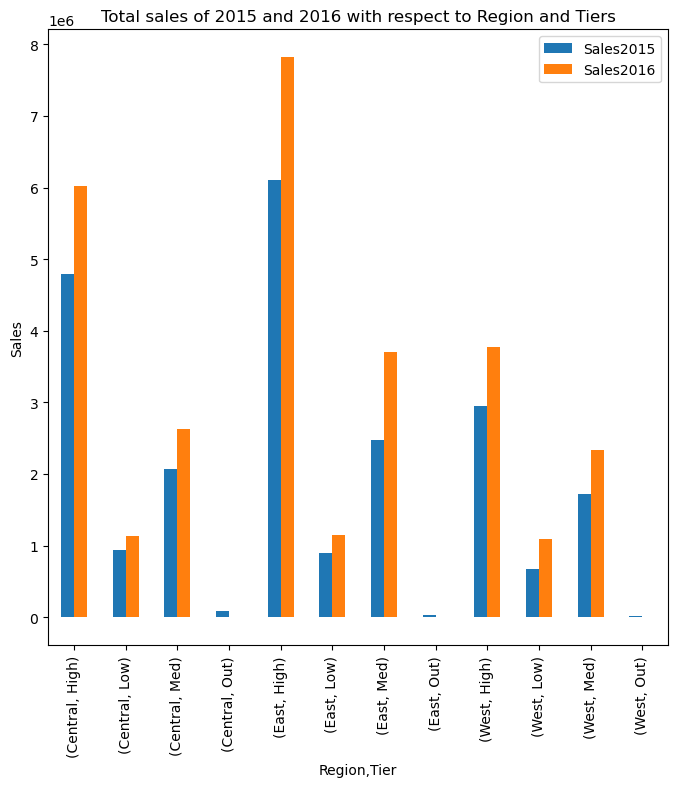

In [5]:
sales_region_tier = sales.groupby(["Region","Tier"])['Sales2015','Sales2016'].sum()
sales_region_tier.plot(kind="bar",figsize=(8,8))
plt.ylabel("Sales")
plt.title("Total sales of 2015 and 2016 with respect to Region and Tiers")
plt.legend()
plt.show()

**4. In East region, which state registered a decline in 2016 as compared to 2015?**

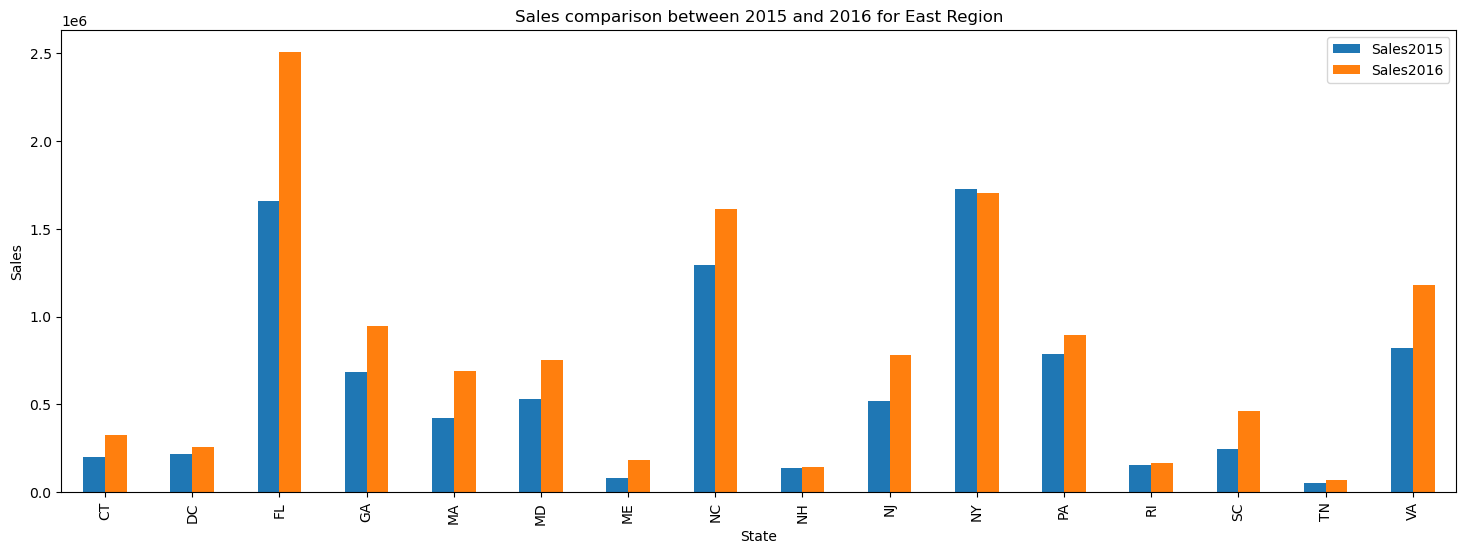

In [6]:
s = sales.loc[(sales.Region == 'East')]
sales4 = s.groupby('State')['Sales2015','Sales2016'].sum()

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.show()

In [7]:
print("NY state registered a decline in sales in 2016 as compared to 2015")

NY state registered a decline in sales in 2016 as compared to 2015


**5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?**

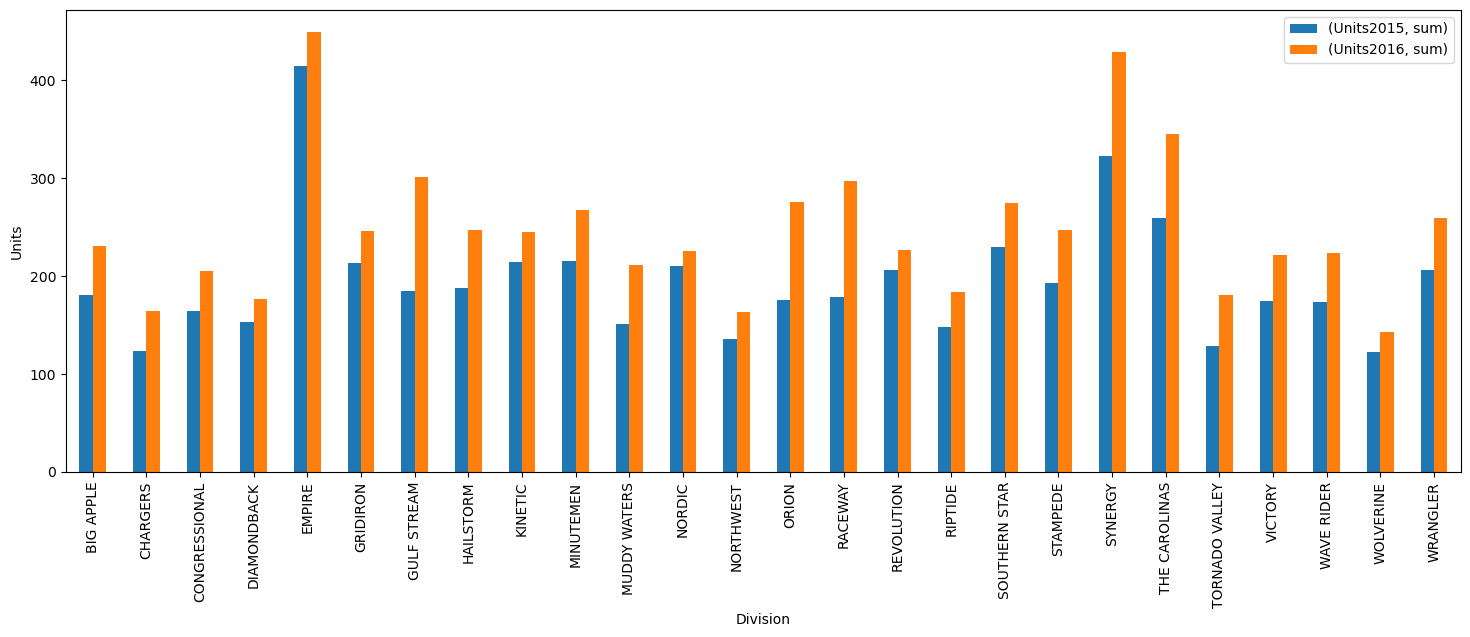

In [8]:
s1 = sales.loc[(sales.Tier == 'High')]
sales4 = s1.groupby(['Division']).agg({'Units2015':['sum'],'Units2016':['sum']})

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Units')
plt.show()

In [9]:
print("No division show decline in number of units sold in 2016 compared to 2015")

No division show decline in number of units sold in 2016 compared to 2015


**6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -**

**• Jan - Mar : Q1**

**• Apr - Jun : Q2**

**• Jul - Sep : Q3**

**• Oct - Dec : Q4**

In [10]:
#Categorizing
sales.loc[(sales.Month == 'Jan') | (sales.Month == 'Feb') | (sales.Month == 'Mar'),'Qtr'] = 'Q1'
sales.loc[(sales.Month == 'Apr') | (sales.Month == 'May') | (sales.Month == 'Jun'),'Qtr'] = 'Q2'
sales.loc[(sales.Month == 'Jul') | (sales.Month == 'Aug') | (sales.Month == 'Sep'),'Qtr'] = 'Q3'
sales.loc[(sales.Month == 'Oct') | (sales.Month == 'Nov') | (sales.Month == 'Dec'),'Qtr'] = 'Q4'
# New column has been added to the sales data - 'Qtr'
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


**7. Compare Qtr wise sales in 2015 and 2016 in a bar plot**

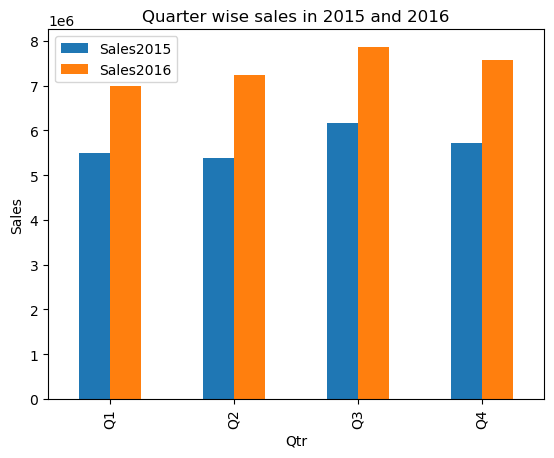

In [11]:
#grouping data based on "Qtr" to find total sales in 2015 and 2016
qtr_sales = sales.groupby("Qtr")["Sales2015","Sales2016"].sum()
qtr_sales.plot(kind="bar")
plt.ylabel("Sales")
plt.title("Quarter wise sales in 2015 and 2016")
plt.show()

**8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.**

In [12]:
#grouping the data based on "Qtr" and "Tier" to find total sales in 2016
qtr_pivot = sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016')
qtr_pivot

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9386.142545,5052.104694,8307.596804,0.000000


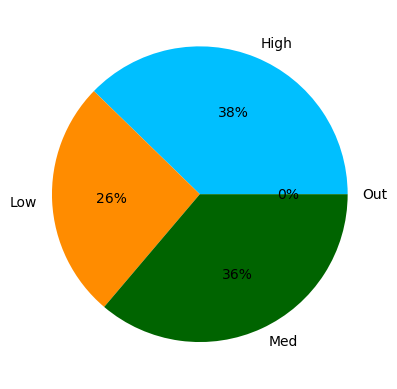

In [13]:
#Qtr Q1
plt.pie(x=qtr_pivot.loc["Q1",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.show()

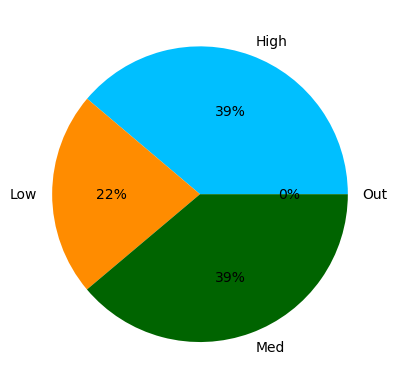

In [14]:
#Qtr Q2
plt.pie(x=qtr_pivot.loc["Q2",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.show()

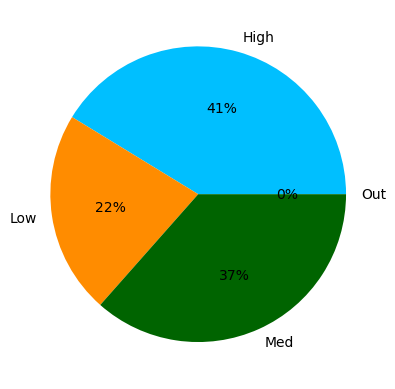

In [15]:
#Qtr Q4
plt.pie(x=qtr_pivot.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['deepskyblue', 'darkorange', 'darkgreen'])
plt.show()